# processing data

In [10]:
from pandas import read_csv
from json import load, dump

df = read_csv('C:/Users/danie/OneDrive/Desktop/GAME Sequencing/taxonomy.tsv', sep='\t').set_index('Feature ID')
df 

,Taxon,Confidence
Feature ID,,
a5ad9574a1f8aea06b6dfaff6eddfff7,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.876989
a27f37aae2a34101f8a61c6f0b1cd246,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.812380
6589433bc08b7cdc5ea1e4928683ed00,k__Bacteria; p__Actinobacteriota; c__Actinobac...,0.978255
38b371de3be6ddef03bea94294e9830d,k__Archaea; p__Euryarchaeota; c__Methanobacter...,0.872175
1b976cc787b3465ddcc891c15c968a9b,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999524
...,...,...
31c50a4d3207815f673d3edebf772af3,k__Bacteria; p__Planctomycetota; c__Planctomyc...,0.986020
36090a0d50aa4bbbffdd4b9953b0c500,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.767113
a35cb9ab8e98072e9a43f7285279bcde,k__Bacteria; p__Firmicutes; c__Dethiobacteria;...,0.999985


In [11]:
df.to_json('taxonomy.json')

js=load(open('taxonomy.json','r'))
js.keys()

dict_keys(['Taxon', 'Confidence'])

In [12]:
definitions = {'k': 'Kingdom', 'p': 'Phylum', 'c': 'Class', 'o': 'Order', 'f': 'Family', 'g': 'Genus', 's': 'Species'}


print(js['Taxon']['a5ad9574a1f8aea06b6dfaff6eddfff7'])
for asv in js['Taxon']:
    dic = {}
    print(asv)
    for p in js['Taxon'][asv].split('; '): 
        content = p.split('__')
        # print(content)
        content[0] = definitions[content[0]] 
        # print('\n')
        # print(dict(content))
        dic[content[0]] = content[1]
    js['Taxon'][asv] = dic

print(js['Taxon']['a5ad9574a1f8aea06b6dfaff6eddfff7'])

k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Halomonadaceae; g__Halomonas; s__midas_s_110869
a5ad9574a1f8aea06b6dfaff6eddfff7
a27f37aae2a34101f8a61c6f0b1cd246
6589433bc08b7cdc5ea1e4928683ed00
38b371de3be6ddef03bea94294e9830d
1b976cc787b3465ddcc891c15c968a9b
3dd54183eecfa8bb215520814056e4b0
1240eb67c8c5004296a23b80d1a10296
016c815a4508d59f5cd00df84f95fa5d
a353b92733af5260a57dd1a0ba3001e1
9ab23c4d99ca81eaa9c30826e3201dd4
e95282c3197d4315d84f31d177642c58
076b820e5b709e62b933f76ab6c45254
3ade0fa13e56aac194bb3373200d6def
b96715d4c2e39e415550cf66da8a67f5
3487ee381e9bba57861b67ac3936d665
08ea1c9b9d368cd6d9bfeb8857e90315
fd95b1c4fe440dbd2ad6a10e70f8ae45
308aa3982d3c398eaae8efce7b0803f2
cd05a4b1cda569ae366c6980823f4c72
07246a1fc2c2fed9e54374f5ee46c333
8c86a02bd0f2c7a90bb40b735577a623
e561c5c5f92aa66e6b1befb81385d1fc
ae72db992b92b97750fc6662153b5369
64fc10f0a6641c24f1fc81c23d55d3b7
cd1f95189b8375347f827f4a8b08dcf7
b65ddb808f41ed58f0a87829f790124c
07e00e1bcc9d9a3

In [13]:
dump(js, open('new_taxonomy.json', 'w'), indent=3)
js

{'Taxon': {'a5ad9574a1f8aea06b6dfaff6eddfff7': {'Kingdom': 'Bacteria',
   'Phylum': 'Proteobacteria',
   'Class': 'Gammaproteobacteria',
   'Order': 'Pseudomonadales',
   'Family': 'Halomonadaceae',
   'Genus': 'Halomonas',
   'Species': 'midas_s_110869'},
  'a27f37aae2a34101f8a61c6f0b1cd246': {'Kingdom': 'Bacteria',
   'Phylum': 'Firmicutes',
   'Class': 'Clostridia',
   'Order': 'Peptostreptococcales-Tissierellales',
   'Family': 'Serpentinicella',
   'Genus': 'midas_g_75908'},
  '6589433bc08b7cdc5ea1e4928683ed00': {'Kingdom': 'Bacteria',
   'Phylum': 'Actinobacteriota',
   'Class': 'Actinobacteria',
   'Order': 'Corynebacteriales',
   'Family': 'Corynebacteriaceae',
   'Genus': 'Corynebacterium',
   'Species': 'midas_s_5929'},
  '38b371de3be6ddef03bea94294e9830d': {'Kingdom': 'Archaea',
   'Phylum': 'Euryarchaeota',
   'Class': 'Methanobacteria',
   'Order': 'Methanobacteriales',
   'Family': 'Methanobacteriaceae',
   'Genus': 'Methanobacterium',
   'Species': 'Methanobacterium_beij

In [14]:
ab = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/ASV_abundance_wideform.csv").set_index("seq")
ab

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/danie/OneDrive/Desktop/GAME Sequencing/ASV_abundance_wideform.csv'

In [ ]:
ab.to_json('abundance.json')

ab_js=load(open('abundance.json','r'))
ab_js.keys()

ab_js

NameError: name 'ab' is not defined

In [62]:
md = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/GAME_Metadata.csv").set_index("sample")
md

,date,days
sample,,
1AB,9.11.23,45.0
2AB,7.73.23,1.0
3AB,10.2.22,66.0
4AB,8.24.23,25.0
5AB,10.15.23,79.0
6AB,10.15.23,81.0
7AB,5.10.24,NaN


In [ ]:
md.T.to_json('metadata.json')

md_js=load(open('metadata.json','r'))
md_js.keys()

md_js

NameError: name 'md' is not defined

# visualizing data

1AB


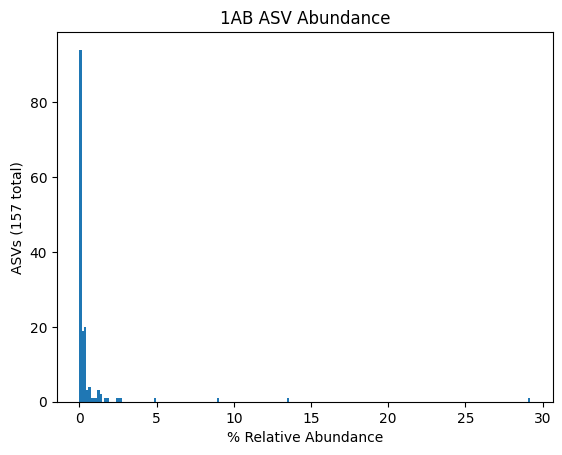

2AB


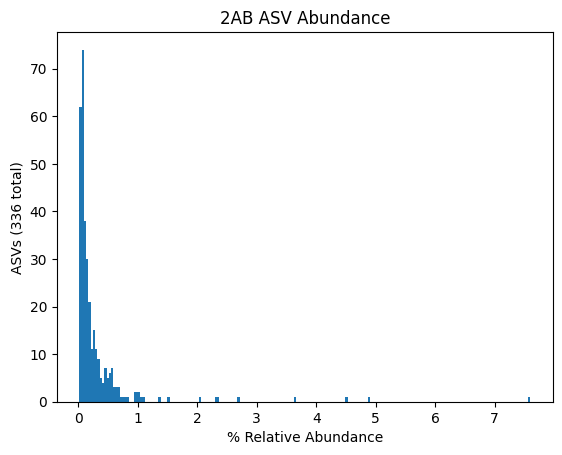

3AB


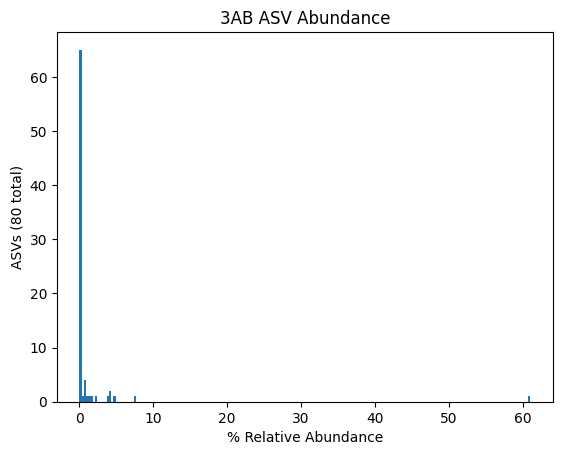

4AB


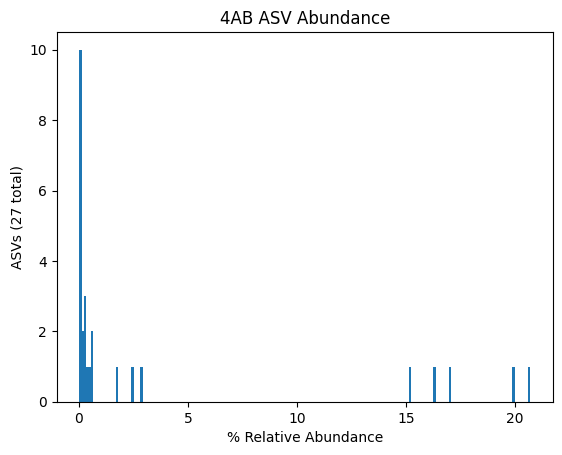

5AB


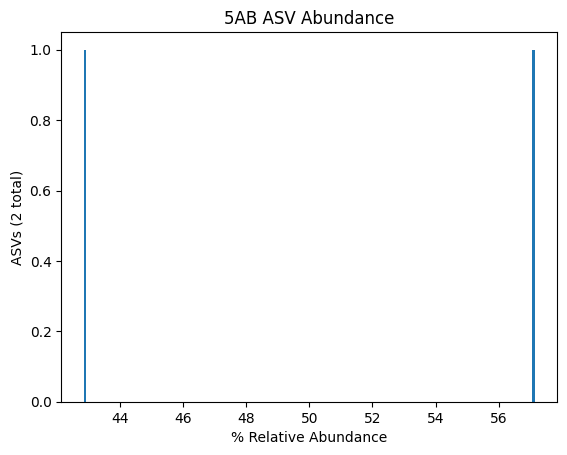

6AB


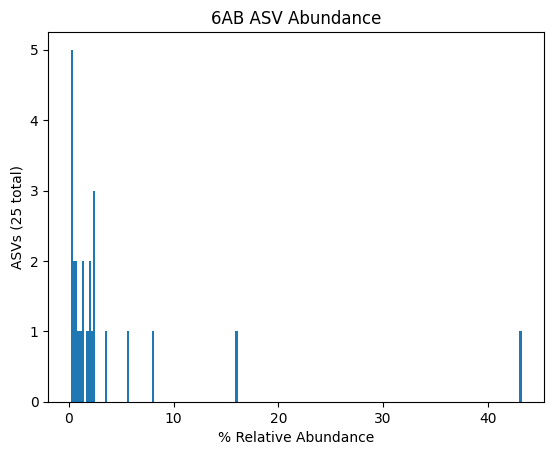

7AB


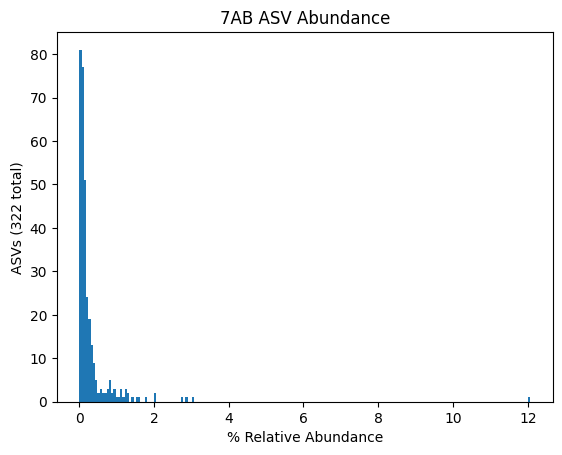

In [72]:
from matplotlib import pyplot as plt

from numpy import array 
for sample, content in ab_js.items() : 
    print(sample)
    abundances = array([x for x in list(content.values()) if x > 0])
    # print(len(abundances))

    plt.hist(abundances, bins=200)

    # Add labels and title
    plt.xlabel('% Relative Abundance')
    plt.ylabel(f'ASVs ({len(abundances)} total)')
    plt.title(f'{sample} ASV Abundance')

    # Display the plot
    plt.show()
    #    for asv, abundance in content.items() : 
#       print(asv)




In [13]:
# import csv
# import numpy as np
# from collections import Counter
# from matplotlib import pyplot as pyplot

# with open("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/GAME_Metadata.csv") as csv_file:
#     csv_reader = csv.DictReader(csv_file)


## functional Grouping and taxonomy 

In [ ]:
# {
#     'Archaea': {
#         "Euryarchaeota": {
#             "Hydrogenotrophic/Acetoclastic": "Y",
#             "Methanobacteria": {
#                 "Methanobacteriales":{
#                     "Methanobacteriaceae":{
#                         "Methanobacterium":{
#                             "Methanobacterium_beijingense": {

#                             }, 
#                             "midas_3006": {

#                             }
#                         }
#                     }
#                 }

#             }

#         }
#     }
# }

In [33]:
taxa = "Phylum"

taxa_asvs = {}
for asv, taxonomy in js['Taxon'].items():
    if taxonomy.get(taxa, 'none') not in taxa_asvs:
        taxa_asvs[taxonomy.get(taxa, 'none')] = []
    taxa_asvs[taxonomy.get(taxa, 'none')].append(asv)



for taxon, asvs in taxa_asvs.items():
    print(taxon, len(asvs))


    


#display(taxa_asvs["none"])

# for sample, abundances in ab.items():
#     print(sample)  
#     for asv, abundance in abundances.items():


Proteobacteria 128
Firmicutes 225
Actinobacteriota 54
Euryarchaeota 9
Cloacimonadota 10
Bacteroidota 75
Chloroflexi 38
Halanaerobiaeota 2
Desulfobacterota 19
Halobacterota 7
Caldatribacteriota 2
Spirochaetota 17
Planctomycetota 20
Synergistota 14
Thermotogota 2
none 3
Verrucomicrobiota 11
SAR324_cladeMarine_group_B 4
Hydrogenedentes 6
Acidobacteriota 4
WS1 5
Patescibacteria 11
Caldisericota 5
Armatimonadota 4
Nanoarchaeota 1
Thermoplasmatota 1
Abditibacteriota 1
Nitrospirota 1
Dependentiae 1
Cyanobacteria 1
Myxococcota 1
Bdellovibrionota 1
Deinococcota 1
Sumerlaeota 1
midas_p_113571 1


## ploting from chat

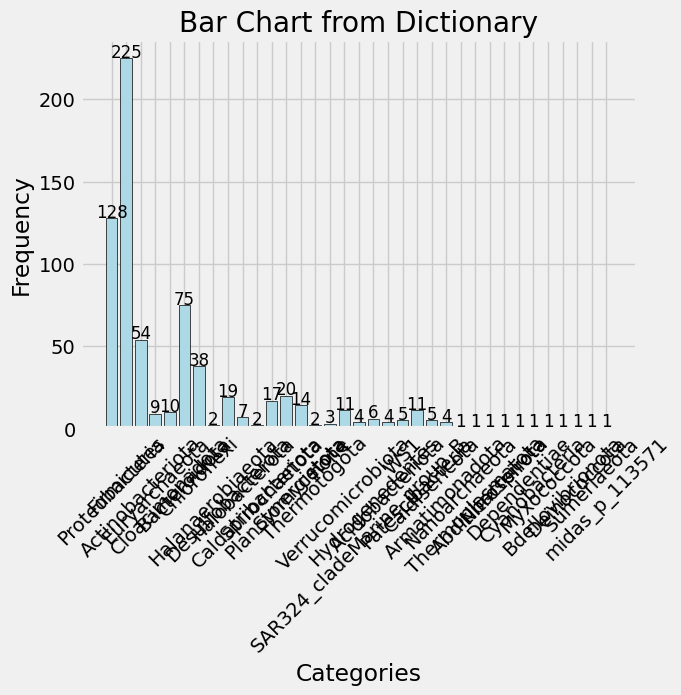

In [34]:

# Create the bar chart
plt.bar(list(taxa_asvs.keys()), list([len(x) for x in taxa_asvs.values()]), color='lightblue', edgecolor='black')

# Add labels on top of each bar
for i, value in enumerate(list([len(x) for x in taxa_asvs.values()])):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12, color='black')

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Bar Chart from Dictionary")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
#Visualizin Functionality

ft = read_csv('C:/Users/danie/OneDrive/Desktop/GAME Sequencing/FunctionalityTable_Genus.csv').set_index('seq')
ft

# ft.to_json('Functionality.json')

# ft_js=load(open('Functionality.json', 'r'))
# ft_js.keys()

# ft_js

new_dict = {}
for seq, row in ft.iterrows():
    sample = row["sample"]
    if sample not in new_dict:
         new_dict[sample] = {}
    new_dict[sample][seq] = {
          "genus": row["Genus"],
          "metabolism": row["Metabolism"],
          "abundance": row["sum_ab"]
     }
from json import dump
dump(new_dict, open("Functionalities.json", 'w'), indent=3)

NameError: name 'read_csv' is not defined